# load mmm sample

In [1]:
%include "EnableIPythonDisplay.swift"

import PythonKit
import Foundation
import FoundationXML

let np = Python.import("numpy")
let plt = Python.import("matplotlib.pyplot")
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [2]:
%include "Sources/MotionDataset/MotionFrame.swift"
%include "Sources/MotionDataset/MotionDataset.swift"

In [3]:
let fileURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/00002_mmm.xml")
let text = try String(contentsOf: fileURL, encoding: .utf8)
let mmm_doc = try XMLDocument(data: text.data(using: .utf8)!, options: [])

In [4]:
let jointNames = mmm_doc.nodes(forXPath: "/MMM/Motion/JointOrder/Joint/@name").map {$0.stringValue!.replacingOccurrences(of: "_joint", with: "")}
print(jointNames)

["BLNx", "BLNy", "BLNz", "BPx", "BPy", "BPz", "BTx", "BTy", "BTz", "BUNx", "BUNy", "BUNz", "LAx", "LAy", "LAz", "LEx", "LEz", "LHx", "LHy", "LHz", "LKx", "LSx", "LSy", "LSz", "LWx", "LWy", "LFx", "LMrot", "RAx", "RAy", "RAz", "REx", "REz", "RHx", "RHy", "RHz", "RKx", "RSx", "RSy", "RSz", "RWx", "RWy", "RFx", "RMrot"]


In [5]:
// TODO: create class that loads dataset and converts it
// TODO: create api for saving the image

In [6]:
// TODO: create struct for motion sample
// TODO: add file loading
// TODO: add annotations
// TODO: add jointNames

In [7]:
func getMotionFrames(mmm_doc: XMLDocument) -> [MotionFrame] {
    var motionFrames: [MotionFrame] = []
    for motionFrame in try! mmm_doc.nodes(forXPath: "/MMM/Motion/MotionFrames/MotionFrame") {
        var mf = MotionFrame()
        let tNode: [XMLNode] = try! motionFrame.nodes(forXPath:"Timestep")
        mf.timestamp = Float(tNode[0].stringValue!)!
        let jpNode: [XMLNode] = try! motionFrame.nodes(forXPath:"JointPosition")
        let jointPosition: String = jpNode[0].stringValue!
        mf.jointPositions = jointPosition.components(separatedBy: " ").map{$0.floatValue}
        motionFrames.append(mf)
    }
    return motionFrames
}

In [8]:
let motionFrames = getMotionFrames(mmm_doc: mmm_doc)
motionFrames.count

531


# visualize sample

In [9]:
let time = np.array(motionFrames.map {$0.timestamp})
let position = np.array(motionFrames.map {$0.jointPositions})

In [10]:
position.shape

(531, 45)


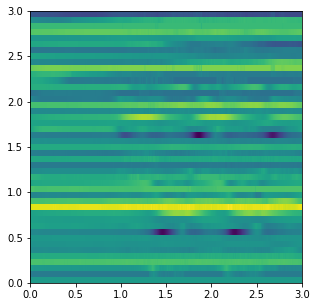

None


In [11]:
plt.figure(figsize: [5, 5])
plt.imshow(position.T, interpolation: "nearest", extent: [0, 3, 0, 3], cmap: "viridis")
plt.show()

# group joints into sections of skeleton

In [12]:
let groupedPosition = np.array(motionFrames.map {$0.grouppedJointPositions()})

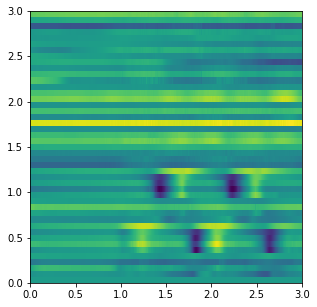

None


In [13]:
plt.figure(figsize: [5, 5])
plt.imshow(groupedPosition.T, interpolation: "nearest", extent: [0, 3, 0, 3], cmap: "viridis")
plt.show()